# WeatherPy 

In [36]:
import requests
from config import api_key
from citipy import citipy
import random as rand
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Generate random cities

In [2]:
cities = []
while len(cities)<650:
    lat = round(rand.uniform(-90,90),2)
    long = round(rand.uniform(-180,180),2)
    city = citipy.nearest_city(lat,long).city_name
    if city not in cities:
        cities.append(city)

# make sure no duplicates
if len(cities) == len(set(cities)):
    print(f'{len(cities)} unique cities generated.')

650 unique cities generated.


## Get current weather for each city from [OpenWeather](https://openweathermap.org/api) and create DataFrame

In [3]:
column_names = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
df = pd.DataFrame(columns = column_names)

series = 1
record = 1
data_gathered_date = ''
for city in cities:
    if (series == 1) & (record == 1):
        print('Beginning Data Retrieval')
        print('------------------------')
        data_gathered_date = date.today().strftime('%m/%d/%Y')
    try:
        res = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}').json()
        name = res['name']
        lat = res['coord']['lat']
        long = res['coord']['lon']
        max_tmp = res['main']['temp_max']
        humid = res['main']['humidity']
        cloud = res['clouds']['all']
        wind = res['wind']['speed']
        country = res['sys']['country']
        date = res['dt']
        df.loc[len(df.index)] = [name,lat,long,max_tmp,humid,cloud,wind,country,date]
        print(f'Processing Record {record} of set {series} | {city.title()}')
    except Exception as e:
        print(f'{city.title()} not found. Skipping...')
    if (record == 50) & (series == 13):
        print('------------------------')
        print('Data Retrieval Complete')
        print('------------------------')
    if record == 50:
        record = 1
        series += 1
    else:
        record +=1

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | Kariba
Processing Record 2 of set 1 | Albany
Processing Record 3 of set 1 | Norman Wells
Processing Record 4 of set 1 | Kushmurun
Processing Record 5 of set 1 | Hermanus
Processing Record 6 of set 1 | Puerto Ayora
Processing Record 7 of set 1 | East London
Processing Record 8 of set 1 | Torbay
Processing Record 9 of set 1 | Tocopilla
Processing Record 10 of set 1 | Tiksi
Processing Record 11 of set 1 | Punta Arenas
Processing Record 12 of set 1 | Pevek
Processing Record 13 of set 1 | Cape Town
Processing Record 14 of set 1 | Arraial Do Cabo
Processing Record 15 of set 1 | Mar Del Plata
Processing Record 16 of set 1 | Sao Filipe
Processing Record 17 of set 1 | Ambilobe
Processing Record 18 of set 1 | Victoria
Processing Record 19 of set 1 | Vila Franca Do Campo
Processing Record 20 of set 1 | Carnarvon
Processing Record 21 of set 1 | Qaqortoq
Processing Record 22 of set 1 | Mataura
Taolanaro not found. Skip

## Export data to [city_weather.csv](output/city_weather.csv)

In [4]:
df.to_csv('output/city_weather.csv')

In [5]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kariba,-16.5167,28.8000,80.20,71,20,5.32,ZW,1616421723
1,Albany,42.6001,-73.9662,51.01,36,0,2.13,US,1616421666
2,Norman Wells,65.2820,-126.8329,-22.00,76,40,2.30,CA,1616421649
3,Kushmurun,52.4503,64.6311,16.48,91,17,8.05,KZ,1616421724
4,Hermanus,-34.4187,19.2345,77.00,59,0,8.99,ZA,1616421673


In [6]:
df[['Humidity','Cloudiness','Date']] = df[['Humidity','Cloudiness','Date']].apply(pd.to_numeric)
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02
mean,20.209345,19.724566,57.115017,68.078073,52.003322,8.624169,1.616422e+09
std,33.401784,88.585390,27.198259,23.080750,39.930597,6.040941,8.592950e+01
min,-54.800000,-175.200000,-28.930000,6.000000,0.000000,0.510000,1.616421e+09
25%,-7.044850,-58.053375,40.295000,55.000000,3.000000,4.215000,1.616422e+09
50%,26.120700,25.053950,62.600000,72.000000,64.500000,7.090000,1.616422e+09
75%,48.035675,96.309625,78.857500,87.000000,90.000000,11.500000,1.616422e+09
max,78.218600,178.416700,107.600000,100.000000,100.000000,39.010000,1.616422e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [8]:
humidity = df['Humidity']
too_humid = [x for x in humidity if x > 100]
if not too_humid:
    print('No cities in the data have a humidity > 100%.')

def style_specific_cell(x):

    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[7, 3] = color
    return df1

df2 = df.describe().style.apply(style_specific_cell, axis=None)
df2

No cities in the data have a humidity > 100%.


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,20.209345,19.724566,57.115017,68.078073,52.003322,8.624169,1616421786.639535
std,33.401784,88.585390,27.198259,23.080750,39.930597,6.040941,85.929495
min,-54.800000,-175.200000,-28.930000,6.000000,0.000000,0.510000,1616421209.000000
25%,-7.044850,-58.053375,40.295000,55.000000,3.000000,4.215000,1616421747.000000
50%,26.120700,25.053950,62.600000,72.000000,64.500000,7.090000,1616421795.000000
75%,48.035675,96.309625,78.857500,87.000000,90.000000,11.500000,1616421850.750000
max,78.218600,178.416700,107.600000,100.000000,100.000000,39.010000,1616421903.000000


## Scatter Plots

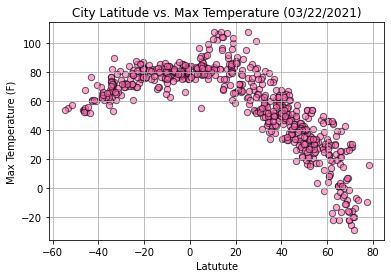

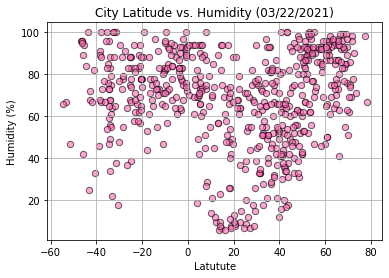

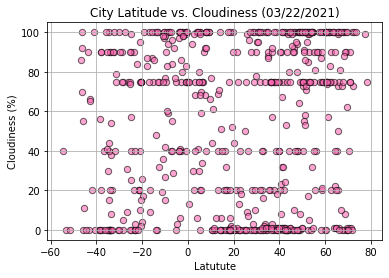

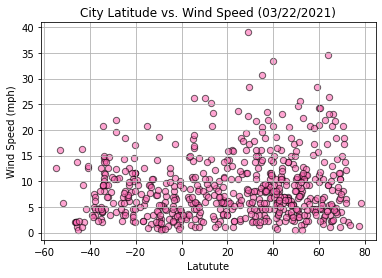

In [27]:
plot_data = [
    {'x':'Lat','y':'Max Temp','title':'Max Temperature','xlabel':'Latutute','ylabel':'Max Temperature (F)'},
    {'x':'Lat','y':'Humidity','title':'Humidity','xlabel':'Latutute','ylabel':'Humidity (%)'},
    {'x':'Lat','y':'Cloudiness','title':'Cloudiness','xlabel':'Latutute','ylabel':'Cloudiness (%)'},
    {'x':'Lat','y':'Wind Speed','title':'Wind Speed','xlabel':'Latutute','ylabel':'Wind Speed (mph)'}
]

def create_plot(x,y,title,xlabel,ylabel,index):    
    df.plot.scatter(x,y,title=f'City Latitude vs. {title} ({data_gathered_date})',c='hotpink',s=40,alpha=.6,edgecolors='black',grid=True);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f'output/fig{index}.png')
    
for i, data in enumerate(plot_data):
    create_plot(data['x'],data['y'],data['title'],data['xlabel'],data['ylabel'],i+1)

### Analysis of Scatter plots
* **Temperature (F) vs. Latitude**
    * The temperature of cities seems to increase the closer they are to the Equator and decrease the futher they are.
* **Humidity (%) vs. Latitude**
    * There does'nt seem to be a correlation between humidity and latitude. However cities with the lowest humidity (below 20%) seem to be clustered around 20 degrees of latitude.
* **Cloudiness (%) vs. Latitude**
    * There does not appear to be any correlation between cloudiness and latitude.
* **Wind Speed (mph) vs. Latitude**
    * There does not appear to be any correlation between wind speed and latitude.

## Linear Regression

In [34]:
northern_df = df.loc[df['Lat'] > 0]
southern_df = df.loc[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7819879305315791


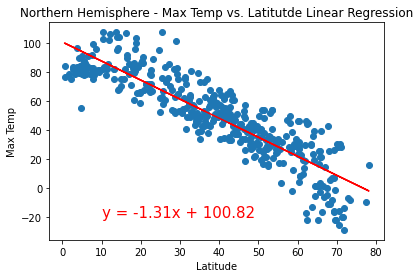

In [43]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.49214085396745016


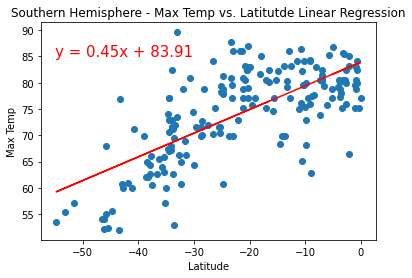

In [47]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.11712088285622119


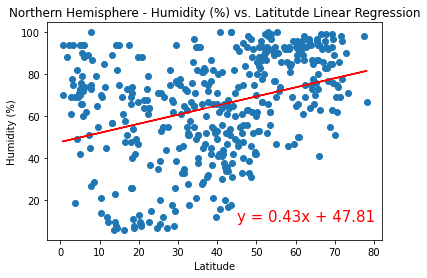

In [59]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.04256766879036521


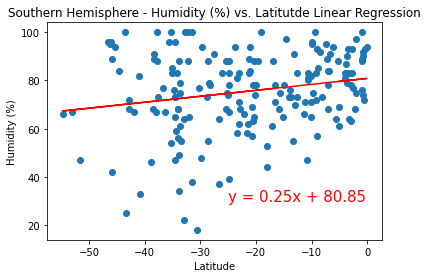

In [58]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.027234597687268346


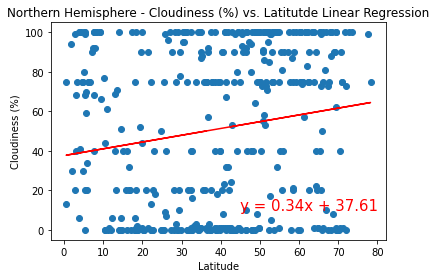

In [57]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.1246834821831635


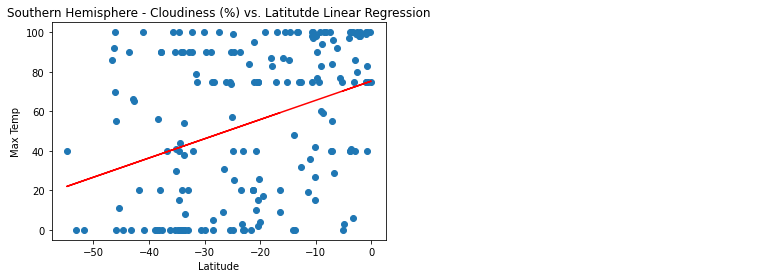

In [56]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0011723893648238686


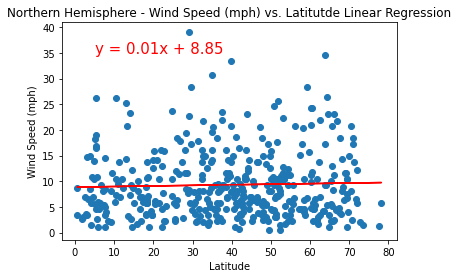

In [63]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.03185510046863089


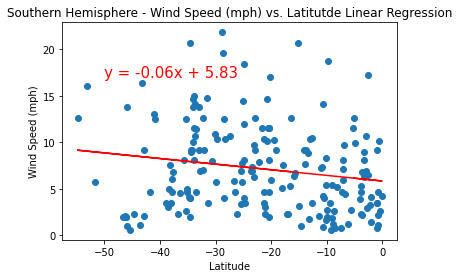

In [65]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()